# Illustration of MOM algorithms

### Library import 

In [1]:
import numpy as np
from sklearn.datasets import make_blobs
from matplotlib import pyplot as plt


### Creation of the dataset

In [10]:
np.random.seed(42)
centers = [-np.ones(2), np.ones(2),-4*np.ones(2)]
X, y = make_blobs(n_samples=1000, n_features=2, cluster_std=1.2,
                  centers=centers, shuffle=True)

In [11]:
Xtest, ytest = make_blobs(n_samples=500, n_features=2, cluster_std=1.2,
                  centers=centers, shuffle=True)

In [12]:
for f in range(30):
    ind=int(np.floor(np.random.rand()*len(X)))
    X=np.vstack([X[:ind],(0.1*(np.random.randn(2))+np.array([24,8])).reshape(1,2),X[ind:]])
    y=np.hstack([y[:ind],[0],y[ind:]])


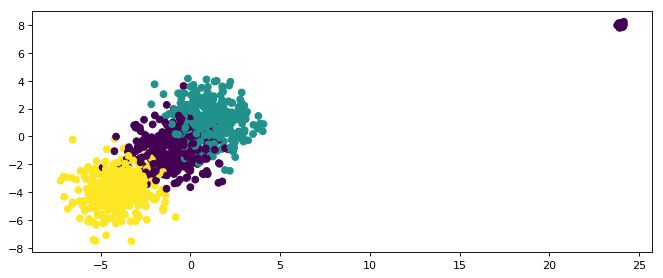

In [13]:
fig=plt.figure(figsize=(10, 4), dpi= 80, facecolor='w', edgecolor='k')
plt.scatter(X[:,0],X[:,1],c=y)
plt.show()

## Plot of the classification Performance

In [17]:
def plot_classif(clfs,title):
    plt.figure(figsize=(10, 4), dpi= 80, facecolor='w', edgecolor='k')
    for i in range(len(clfs)):
        clf=clfs[i]
        plt.subplot(1,len(clfs),i+1)
        clf.fit(X,y)
        pred=clf.predict(Xtest)
        xx, yy = np.meshgrid(np.arange(-6, 25, 0.2), np.arange(-6, 9, 0.2))
        Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
        Z = Z.reshape(xx.shape)
        plt.pcolormesh(xx, yy, Z, cmap=plt.cm.Paired)
        plt.scatter(Xtest[:,0],Xtest[:,1],c=ytest)
        plt.title(title[i]+' :'+str(np.mean(ytest==pred)))

In [18]:
from linear_model_MOM import logregMOM,perceptronMOM
from sklearn.linear_model import LogisticRegression

/home/frost/math/stagemom/MOMpower/linear_model_MOM.py:382: RuntimeWarning: overflow encountered in exp
  return np.log(1+np.exp(-(2*y-1)*pred))


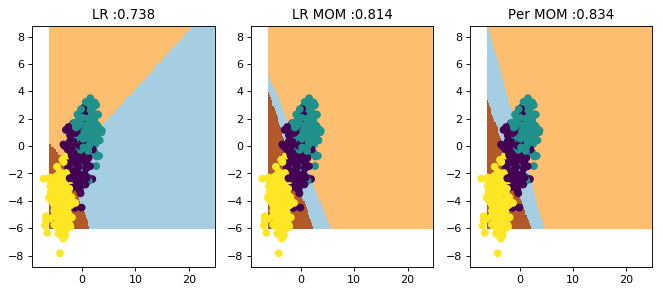

In [24]:
clf=LogisticRegression()
clfMOM=logregMOM([-2,5,1],120,10,0.1,300,agg=1)
clfMOM2=perceptronMOM([-2,5,1],120,10,300,agg=1)
plt.figure(figsize=(10, 4), dpi= 80, facecolor='w', edgecolor='k')
plot_classif([clf,clfMOM,clfMOM2],['LR','LR MOM','Per MOM'])
plt.show()